## Data import

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
X_train = np.load('/content/drive/MyDrive/Colab Notebooks/Duomenų folderis/X_train.npy')
X_pred = np.load('/content/drive/MyDrive/Colab Notebooks/Duomenų folderis/X_pred.npy')
X_val = np.load('/content/drive/MyDrive/Colab Notebooks/Duomenų folderis/X_val.npy')
y_val = np.load('/content/drive/MyDrive/Colab Notebooks/Duomenų folderis/y_val.npy')
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/Duomenų folderis/X_test.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/Duomenų folderis/y_test.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from fltlnd_imports import *

## Building a tiny model

In [ ]:
mimic_model = Sequential([
    #MaxPooling2D((2,2)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(2,2)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(1,1)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(1,1)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(1,1)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(2,2)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(1,1)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(1,1)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(1,1)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(2,2)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(1,1)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(1,1)),
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', strides=(1,1)),
    Flatten(),
    Dense(30, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])
mimic_model.build((None, 50,50,1))
mimic_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=3e-4))

In [ ]:
mimic_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 25, 25, 10)        100       
                                                                 
 conv2d_69 (Conv2D)          (None, 25, 25, 10)        910       
                                                                 
 conv2d_70 (Conv2D)          (None, 25, 25, 10)        910       
                                                                 
 conv2d_71 (Conv2D)          (None, 25, 25, 10)        910       
                                                                 
 conv2d_72 (Conv2D)          (None, 13, 13, 10)        910       
                                                                 
 conv2d_73 (Conv2D)          (None, 13, 13, 10)        910       
                                                                 
 conv2d_74 (Conv2D)          (None, 13, 13, 10)      

**Original model:** \\
loss: [0.36], val_loss: [0.11]

Train set accuracy: 0.9667857 \\
Validation set accuracy: 0.9845

Train set accuracy: 0.9665476
Validation set accuracy: 0.984


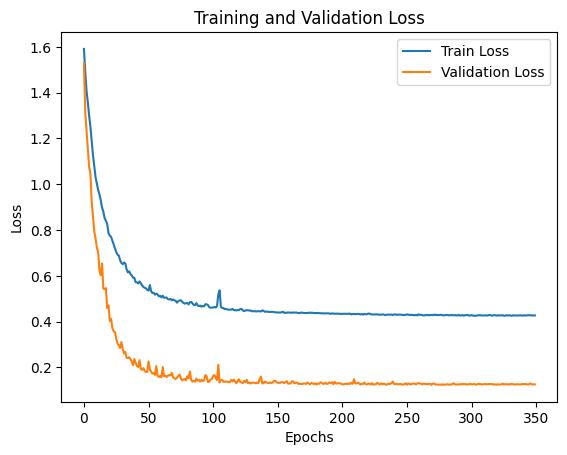

In [ ]:
train_and_eval_pipe(mimic_model, X_train, X_pred, X_val, y_val, epochs_number = 350)

**Original model:** \\
Test set accuracy: 0.9825

In [ ]:
test_set_accuracy(mimic_model, X_test, y_test)

Test set accuracy: 0.975


In [ ]:
mimic_model.save('model115_6.h5')